# <u>Submission instructions</u>
### Submission in pairs unless otherwise authorized
<ul style="font-size: 17px">
<li> This notebook contains all the questions. You should follow the instructions below.</li>
<li> Solutions for both theoretical and practical parts should be written in this notebook</li>
</ul>

<h3> Moodle submission</h3>


<p style="font-size: 17px">
You should submit three files:
</p>
<ul style="font-size: 17px">
<li>IPYNB notebook:
  <ul>
  <li>All the wet and dry parts, including code, graphs, discussion, etc.</li>
  </ul>
</li>
<li>PDF file:
  <ul>
  <li>Export the notebook to PDF. Make sure that all the cells are visible.</li>
  </ul>
</li>
</ul>
<p style="font-size: 17px">
All files should be in the following format: "HW2_ID1_ID2.file"
<br>
Good Luck!
</p>

# Question 1 - Generalizrtion and Overfit (30 pt)

<p style="font-size: 17px"> In this exercise, we will demonstrate overfitting to random labels.The settings are the following:
<ul style="font-size: 17px">
<li> Use the MNIST dataset.
<li> Work on the first 128 samples from the training dataset.
<li> Fix the following parameters:
    <ul>
        <li> Shuffle to False.
        <li> Batch size to 128.
    </ul>
<li> Generate random labels from Bernoulli distribution with a probability of $\frac{1}{2}$. I.e.,each sample is assigned a random label which is zero or one.
</ul>

<p style="font-size: 17px">
Show that by using a Fully Connected netwrok and cross-entropy loss, you are able to achieve a loss value of ~0 (the lower the better).
Plot the accuracy and loss convergence for this data and the test data as a function of epochs.
What is the accuracy value of the test data? Explain
</p>

In [1]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader

import pandas as pd
import matplotlib.pyplot as plt

# Constants
EPOCHS = 30
BATCH_SIZE = 128
NUM_OF_CLASSES = 2 # 0 or 1

# Transformation for the data
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torch.flatten])

In [2]:
# Create dataloaders
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                            download=True, transform=transform)


train_dataset = torch.utils.data.Subset(train_dataset, torch.arange(128))

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=False)


test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                           download=True, transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [3]:
# Generate random labels from Bernoulli distribution with a p = 0.5
p = 0.5

y_train = torch.bernoulli(torch.full((len(train_dataset),), p))
y_test = torch.bernoulli(torch.full((len(test_dataset),), p))

In [4]:
# Define the Fully Connected Network model

class FullyConnectedNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FullyConnectedNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [5]:
model = FullyConnectedNN(784, 128, NUM_OF_CLASSES)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [6]:
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

for epoch in range(EPOCHS):
    
    # Training
    model.train() # Set the model to training mode
    epoch_train_loss = 0
    correct_train_predictions = 0
    
    for i, (train_inputs, _) in enumerate(train_dataloader):             
        train_labels = y_train[(i * BATCH_SIZE) : ((i+1) * BATCH_SIZE)]

        # Forward pass
        train_outputs = model(train_inputs)
        loss = criterion(train_outputs, train_labels.long())
        epoch_train_loss += loss.item()

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, predicted_labels = torch.max(train_outputs, 1)
        correct_train_predictions += (predicted_labels == train_labels).sum().item()

    train_accuracy.append(correct_train_predictions / len(train_dataset))
    train_loss.append(epoch_train_loss / len(train_dataloader))

    # Testing                  
    model.eval() # Set the model to evaluation mode
    epoch_test_loss = 0
    correct_test_predictions = 0

    with torch.no_grad():
        for j, (test_inputs, _) in enumerate(test_dataloader):
            test_labels = y_test[(j * BATCH_SIZE) : ((j+1) * BATCH_SIZE)]
                          
            test_outputs = model(test_inputs)
            loss = criterion(test_outputs, test_labels.long())
            epoch_test_loss += loss.item()

            _, predicted_labels = torch.max(test_outputs, 1)
            correct_test_predictions += (predicted_labels == test_labels).sum().item()

    test_accuracy.append(correct_test_predictions / len(test_dataset))
    test_loss.append(epoch_test_loss / len(test_dataloader))


#     Print the results for the current epoch
    print(f'Epoch [{epoch+1}/{EPOCHS}], Train Loss: {train_loss[-1]:.4f}, Train Accuracy: {train_accuracy[-1]* 100:.2f}%, '
          f'Test Loss: {test_loss[-1]:.4f}, Test Accuracy: {test_accuracy[-1]* 100:.2f}%')

Epoch [1/30], Train Loss: 0.6969, Train Accuracy: 50.00%, Test Loss: 0.6943, Test Accuracy: 49.59%
Epoch [2/30], Train Loss: 0.6712, Train Accuracy: 72.66%, Test Loss: 0.6961, Test Accuracy: 49.66%
Epoch [3/30], Train Loss: 0.6500, Train Accuracy: 78.12%, Test Loss: 0.6984, Test Accuracy: 49.60%
Epoch [4/30], Train Loss: 0.6295, Train Accuracy: 77.34%, Test Loss: 0.7024, Test Accuracy: 49.60%
Epoch [5/30], Train Loss: 0.6101, Train Accuracy: 77.34%, Test Loss: 0.7078, Test Accuracy: 49.45%
Epoch [6/30], Train Loss: 0.5912, Train Accuracy: 77.34%, Test Loss: 0.7142, Test Accuracy: 49.42%
Epoch [7/30], Train Loss: 0.5725, Train Accuracy: 78.12%, Test Loss: 0.7217, Test Accuracy: 49.32%
Epoch [8/30], Train Loss: 0.5542, Train Accuracy: 78.91%, Test Loss: 0.7306, Test Accuracy: 49.17%
Epoch [9/30], Train Loss: 0.5366, Train Accuracy: 77.34%, Test Loss: 0.7402, Test Accuracy: 49.18%
Epoch [10/30], Train Loss: 0.5192, Train Accuracy: 79.69%, Test Loss: 0.7500, Test Accuracy: 49.07%
Epoch [11

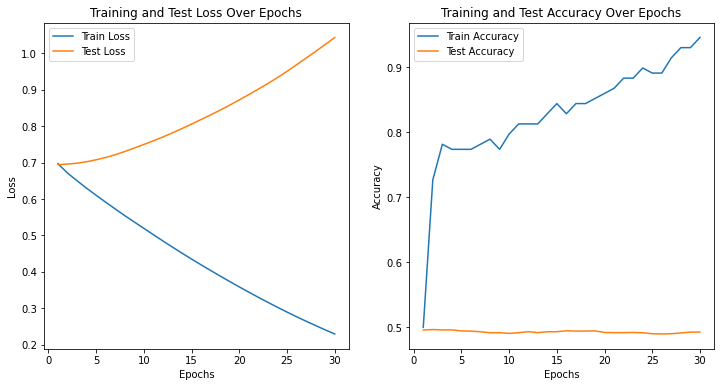

In [7]:
# Plot the accuracy and loss as a function of the epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, EPOCHS + 1), train_loss, label='Train Loss')
plt.plot(range(1, EPOCHS + 1), test_loss, label='Test Loss')
plt.title('Training and Test Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, EPOCHS + 1), train_accuracy, label='Train Accuracy')
plt.plot(range(1, EPOCHS + 1), test_accuracy, label='Test Accuracy')
plt.title('Training and Test Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Explanation:**

While the network achieves decreasing training loss and increasing training accuracy, indicating learning from the training data, the testing loss increases steadily, suggesting low generalization. The testing accuracy remains stagnant around 50%, indicating the model's failure to perform better than random guessing on unseen data. This highlights the issue of overfitting, where the model memorizes the training data but fails to generalize. Therefore, although the network achieves a low training loss, it does not translate to satisfactory performance on the test data, underscoring the need for addressing overfitting and improving generalization capabilities.

********************

<h1> Question 2 - Sentiment Analysis - Classification (70 pt)</h1>

### Exercise
<p style="font-size: 17px">
The goal of this exercise is to get familiar with recurrent neural networks. 
<br><br>
The field of detecting which emotion is represented in a text is developing and being
studied due to its usefulness. For example, detecting if a review is positive or
negative and more.
<br><br>
In this exercise, you will detect the emotion of a sentence. You should get at least 47% accuracy on the test set.
<br><br>
You should
<ul style="font-size: 17px">
  <li> Try different model architectures - Vanilla RNN and Gated model (GRU/LSTM)</li>
  <li> Use different optimization and regularization methods </li>
  <li> Try different combinations of hyperparamters</li>
</ul>
</p>

<br>

### Data

<p style="font-size: 17px">
The data is a csv file containing tweets and their labels according to the emotion –
{happiness, sadness, neutral}. Every row in the file (except for the header) is an
example. 
<br>
Examples: (Notepad++ view)
<ul style="font-size: 17px">
  <li> happiness,Welcome @doeko ! Really glad to know you here. Your products rox man</li>
  <li> sadness,Disappointment really sucks! I'm getting used to it.</li>
  <li> neutral,I just want to Sleep.</li>
</ul>
<p style="font-size: 17px">
You have a train file – "trainEmotions.csv" and a test file – "testEmotions.csv". Both files can be found in the "HW2_data.zip" file.
</p>

### a) EDA (10 pt)

<p style="font-size: 17px">
Explore and analyze your data. Explain your data cleaning and processing pipeline.
</p>

In [8]:
import glob
import unidecode
import torch
import unicodedata
import string
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

C:\Users\USER\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [9]:
#clean the data from unknown signs
def clean_text(text):
    return unidecode.unidecode(text)

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return torch.tensor(all_letters.find(letter), dtype=torch.long).unsqueeze(0)

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    return torch.nn.functional.one_hot(
        torch.stack([letterToIndex(letter) for letter in line]),
        num_classes=n_letters)

In [10]:
# Upload Train Data
train_df = pd.read_csv('trainEmotions.csv')
train_df.head(5)

,emotion,content
0,happiness,victory for the bulldogs was celebrated by 3 w...
1,happiness,"@saraLDS Thanks for that, Sara"
2,happiness,@Tony_Mandarich well welcome back from the dar...
3,happiness,"@sai_shediddy lol , you gotta share too"
4,happiness,"first up, make up for lost time with jelly. Ja..."


In [11]:
def check_unique():
    unique_chars = set()

    # Iterate over each element in the 'content' column
    for tweet in train_df['content']:
        unique_chars.update(tweet)
    
    return unique_chars

unique_chars = check_unique()
print(f"there are {len(unique_chars)} unique characters in train_df['content']: ")

there are 98 unique characters in train_df['content']: 


In [12]:
#all printable characters
all_letters = set(string.printable)
non_printable_chars = unique_chars - all_letters
print(f"there are {len(non_printable_chars)} not printable characters in train_df['content']: {non_printable_chars}")

there are 6 not printable characters in train_df['content']: {'½', '´', 'ï', '¿', '\xa0', 'Â'}


In [13]:
# we want to remove to following chars 
train_df['content'] = train_df['content'].apply(clean_text)

unique_chars = check_unique()
print(f"there are {len(unique_chars)} unique characters in train_df['content']: ")

there are 92 unique characters in train_df['content']: 


In [14]:
# Split the DataFrame into features (X) and labels (y)
X_train = train_df['content']  # Features (text content)
y_train = train_df['emotion']   # Labels (emotional states)

In [15]:
# Upload Test Data and clean as well
test_df = pd.read_csv('testEmotions.csv')
test_df['content'] = test_df['content'].apply(clean_text)

# Split the DataFrame into features (X) and labels (y)
X_test = test_df['content']  # Features (text content)
y_test = test_df['emotion']   # Labels (emotional states)

**Explanation of our data cleaning and processing**

We removed any characters from the 'content' column that couldn't be transformed into ASCII representation.
This standardization of the text data enhances its suitability for processing later in the RNN model.

*****************************

### b) Main (50 pt)

<p style="font-size: 17px">
Define 2 models, as requested. Train and eval them.
<ul style="font-size: 17px">
<li> Plot the gated model's accuracy and loss (both on train and test sets) as a function of the epochs.
<li> Plot a confusion matrix
</ul>

</p>

In [16]:
#from tutorial - {label: list of content} dict
def categories_dict():
    label_examples_dict = {}
    for index, content in enumerate(train_df['content']):
        label = y_train.iloc[index]

        # Check if the label is already in the dictionary
        if label in label_examples_dict:
            label_examples_dict[label].append(content)
        else:
            label_examples_dict[label] = [content]
    return label_examples_dict

In [17]:
#all printable characters
all_letters = string.printable
n_letters = len(all_letters)

# Build the category_lines dictionary, a list of names per label
category_lines = categories_dict()

#labels names
all_categories = ['happiness', 'sadness', 'neutral']
n_categories = len(all_categories)

In [18]:
# Create custom dataset class to load the tokenized data
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

## 1. Vanilla RNN

In [19]:
class RNN(nn.Module):
    def __init__(self, input_size= 15797, hidden_size=128, output_size=3):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fully_connected = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        hidden = self.init_hidden()
        output, hidden = self.rnn(x.unsqueeze(0), hidden)
        output = output.squeeze(0)
        output = self.fully_connected(output)
        return output, hidden

    def init_hidden(self):
        hidden = torch.zeros(1, 1, self.hidden_size)
        return hidden

n_hidden = 128

In [20]:
# Initialize LabelEncoder & transform labels
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [21]:
# Tokenize text using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(train_df['content']).toarray()
y_train = train_df['emotion'].values

X_test = vectorizer.transform(test_df['content']).toarray()
y_test = test_df['emotion'].values

In [22]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)

In [23]:
# Define DataLoader
train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=1000, shuffle=True)

test_dataset = CustomDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=True)

In [24]:
# Instantiate the model
model = RNN(input_size= X_train.shape[1], hidden_size=n_hidden, output_size=n_categories)

In [25]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## train the model

In [26]:
# Initialize lists to store metrics
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

max_test_accuracy = 0

num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    correct_train = 0
    total_train = 0
    running_loss = 0.0
    
    for batch_inputs, batch_labels in train_loader:
        optimizer.zero_grad()
        

        # Forward pass
        outputs, _ = model(batch_inputs)
        loss = criterion(outputs, batch_labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Compute training accuracy
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == batch_labels).sum().item()
        total_train += batch_labels.size(0)
        
        running_loss += loss.item()
    
    # Compute average training loss and accuracy
    train_loss = running_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    
    # Append to lists
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    
    # Evaluate on test set
    model.eval()  # Set the model to evaluation mode
    correct_test = 0
    total_test = 0
    test_running_loss = 0.0
    
    with torch.no_grad():
        for batch_inputs, batch_labels in test_loader:
                            
            outputs, _ = model(batch_inputs)
            loss = criterion(outputs, batch_labels)
            
            # Compute test accuracy
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == batch_labels).sum().item()
            total_test += batch_labels.size(0)
            
            test_running_loss += loss.item()
    
    # Compute average test loss and accuracy
    test_loss = test_running_loss / len(test_loader)
    test_accuracy = correct_test / total_test
    
    # Append to lists
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    if test_accuracy > max_test_accuracy:
        max_test_accuracy = test_accuracy
    
    # Print progress
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.4f}')

Epoch [1/10], Train Loss: 1.0699, Train Acc: 0.4066, Test Loss: 1.0649, Test Acc: 0.4621
Epoch [2/10], Train Loss: 0.9818, Train Acc: 0.6076, Test Loss: 1.0351, Test Acc: 0.5142
Epoch [3/10], Train Loss: 0.8777, Train Acc: 0.7035, Test Loss: 1.0166, Test Acc: 0.5214
Epoch [4/10], Train Loss: 0.7644, Train Acc: 0.7625, Test Loss: 1.0086, Test Acc: 0.5166
Epoch [5/10], Train Loss: 0.6574, Train Acc: 0.7984, Test Loss: 1.0058, Test Acc: 0.5235
Epoch [6/10], Train Loss: 0.5636, Train Acc: 0.8305, Test Loss: 1.0212, Test Acc: 0.5264
Epoch [7/10], Train Loss: 0.4814, Train Acc: 0.8578, Test Loss: 1.0801, Test Acc: 0.5086
Epoch [8/10], Train Loss: 0.4130, Train Acc: 0.8856, Test Loss: 1.0984, Test Acc: 0.5086
Epoch [9/10], Train Loss: 0.3581, Train Acc: 0.9042, Test Loss: 1.1159, Test Acc: 0.5106
Epoch [10/10], Train Loss: 0.3100, Train Acc: 0.9196, Test Loss: 1.1898, Test Acc: 0.5005


In [27]:
print(f'Reached Max Accuracy of: {max_test_accuracy*100:.2f} on Test')

Reached Max Accuracy of: 52.64 on Test


## plot the results

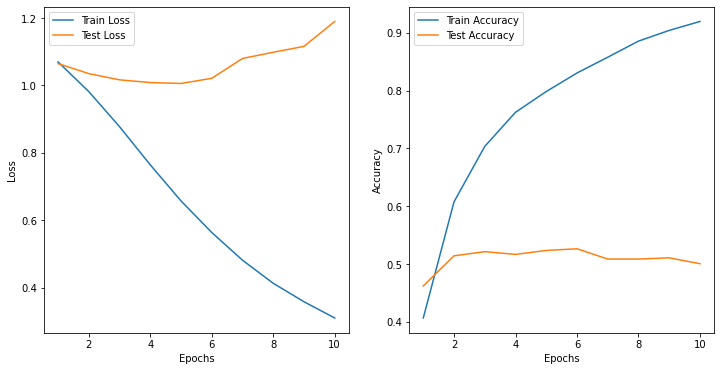

In [28]:
# Plot the accuracy and loss as a function of the epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## confusion matrix

In [29]:
def categoryFromOutput(output):
    max_val, argmax = output.max(dim=1,  keepdim=True) 
    category_i = argmax.item()
    return all_categories[category_i], category_i

In [30]:
# Function to evaluate the model
def evaluate_model(model, test_loader):
    all_predictions = []
    all_targets = []

    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        for batch_inputs, batch_labels in test_loader:
            outputs, _ = model(batch_inputs)
            _, predicted = torch.max(outputs, 1)
            all_predictions.extend(predicted.tolist())
            all_targets.extend(batch_labels.tolist())
    
    return all_predictions, all_targets

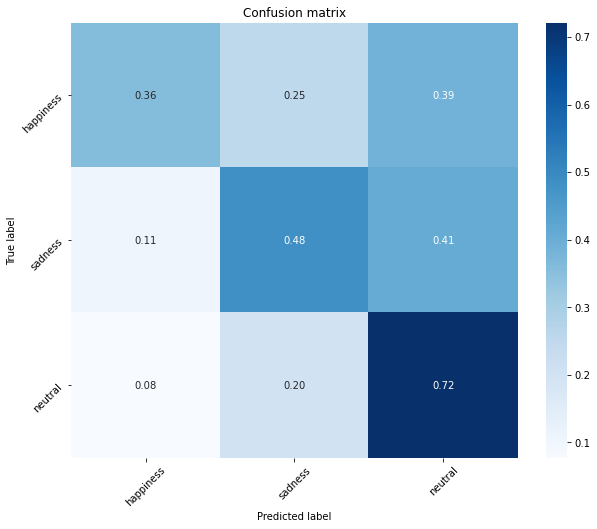

In [31]:
# Evaluate the model
predictions, targets = evaluate_model(model, test_loader)


# Create confusion matrix
confusion = confusion_matrix(targets, predictions)

# Normalize the confusion matrix
confusion = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix with heatmap colors and numbers
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='.2f')  # Change the colormap as desired
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(len(all_categories)) + 0.5, all_categories, rotation=45)
plt.yticks(np.arange(len(all_categories)) + 0.5, all_categories, rotation=45)
plt.show()


## 2. Gated model (GRU/LSTM)

In [32]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, rnn_type='lstm'):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # Taking the output from the last time step
        return out

In [33]:
# Initialize LabelEncoder & transform labels

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [34]:
# Tokenize text using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(train_df['content']).toarray()
y_train = train_df['emotion'].values

X_test = vectorizer.transform(test_df['content']).toarray()
y_test = test_df['emotion'].values

In [35]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)

In [36]:
# Create custom dataset class to load the tokenized data
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [60]:
# Define DataLoader
train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=1000, shuffle=True)

test_dataset = CustomDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=True)

In [61]:
# Instantiate the model
model = RNN(input_size= X_train.shape[1], hidden_size=512, output_size=n_categories)

In [62]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## train the model

In [63]:
# Initialize lists to store metrics
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

max_test_accuracy = 0

num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    correct_train = 0
    total_train = 0
    running_loss = 0.0
    
    for batch_inputs, batch_labels in train_loader:
        optimizer.zero_grad()
        
        batch_inputs = batch_inputs.unsqueeze(1)

        # Forward pass
        outputs = model(batch_inputs)
        loss = criterion(outputs, batch_labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Compute training accuracy
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == batch_labels).sum().item()
        total_train += batch_labels.size(0)
        
        running_loss += loss.item()
    
    # Compute average training loss and accuracy
    train_loss = running_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    
    # Append to lists
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    
    # Evaluate on test set
    model.eval()  # Set the model to evaluation mode
    test_predictions = []
    test_labels = []
    correct_test = 0
    total_test = 0
    test_running_loss = 0.0
    
    with torch.no_grad():
        for batch_inputs, batch_labels in test_loader:
            
            batch_inputs = batch_inputs.unsqueeze(1)
                
            outputs = model(batch_inputs)
            loss = criterion(outputs, batch_labels)
            
            # Compute test accuracy
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == batch_labels).sum().item()
            total_test += batch_labels.size(0)
            test_predictions.extend(predicted.tolist())
            test_labels.extend(batch_labels.tolist())
            
            test_running_loss += loss.item()
    
    # Compute average test loss and accuracy
    test_loss = test_running_loss / len(test_loader)
    test_accuracy = correct_test / total_test
    
    # Append to lists
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    if test_accuracy > max_test_accuracy:
        max_test_accuracy = test_accuracy
    
    # Print progress
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.4f}')

Epoch [1/10], Train Loss: 1.0801, Train Acc: 0.4298, Test Loss: 1.0686, Test Acc: 0.4515
Epoch [2/10], Train Loss: 0.9870, Train Acc: 0.5847, Test Loss: 1.0282, Test Acc: 0.5330
Epoch [3/10], Train Loss: 0.8372, Train Acc: 0.7468, Test Loss: 1.0113, Test Acc: 0.5214
Epoch [4/10], Train Loss: 0.6647, Train Acc: 0.8117, Test Loss: 1.0252, Test Acc: 0.5173
Epoch [5/10], Train Loss: 0.5158, Train Acc: 0.8454, Test Loss: 1.0889, Test Acc: 0.5144
Epoch [6/10], Train Loss: 0.4010, Train Acc: 0.8823, Test Loss: 1.1533, Test Acc: 0.5115
Epoch [7/10], Train Loss: 0.3158, Train Acc: 0.9097, Test Loss: 1.2388, Test Acc: 0.5032
Epoch [8/10], Train Loss: 0.2525, Train Acc: 0.9326, Test Loss: 1.3240, Test Acc: 0.4987
Epoch [9/10], Train Loss: 0.2055, Train Acc: 0.9487, Test Loss: 1.4092, Test Acc: 0.4937
Epoch [10/10], Train Loss: 0.1695, Train Acc: 0.9579, Test Loss: 1.5055, Test Acc: 0.4827


In [64]:
print(f'Reached Max Accuracy of: {max_test_accuracy*100:.2f} on Test')

Reached Max Accuracy of: 53.30 on Test


## plot the results

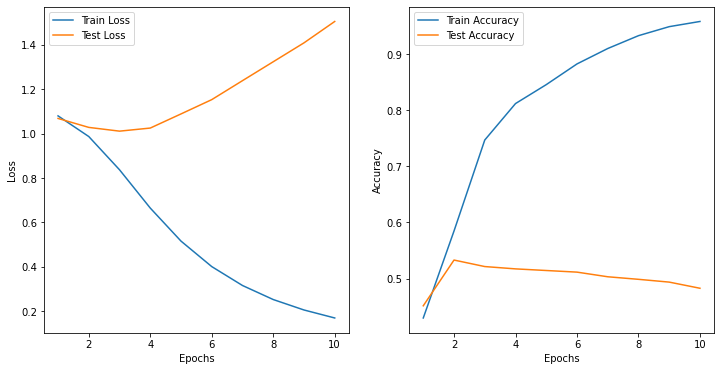

In [65]:
# Plot the accuracy and loss as a function of the epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## confusion matrix

In [66]:
def categoryFromOutput(output):
    max_val, argmax = output.max(dim=1,  keepdim=True) 
    category_i = argmax.item()
    return all_categories[category_i], category_i

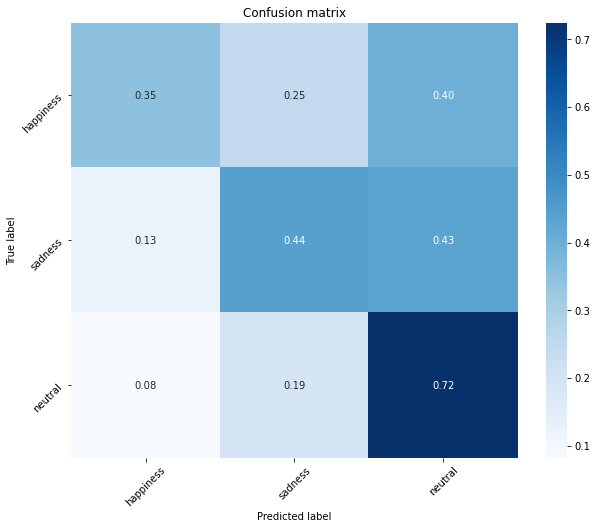

In [67]:
# Evaluate the model
#predictions, targets = evaluate_model(model, test_loader)


# Create confusion matrix
confusion = confusion_matrix(test_labels, test_predictions)

# Normalize the confusion matrix
confusion = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix with heatmap colors and numbers
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='.2f')  # Change the colormap as desired
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(len(all_categories)) + 0.5, all_categories, rotation=45)
plt.yticks(np.arange(len(all_categories)) + 0.5, all_categories, rotation=45)
plt.show()


## different optimization:

we will use our LSTM model from now on

In [68]:
def train(model):
    # Initialize lists to store metrics
    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []

    max_test_accuracy = 0

    num_epochs = 10

    # Training loop
    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        correct_train = 0
        total_train = 0
        running_loss = 0.0

        for batch_inputs, batch_labels in train_loader:
            optimizer.zero_grad()

            batch_inputs = batch_inputs.unsqueeze(1)

            # Forward pass
            outputs = model(batch_inputs)
            loss = criterion(outputs, batch_labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            # Compute training accuracy
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == batch_labels).sum().item()
            total_train += batch_labels.size(0)

            running_loss += loss.item()

        # Compute average training loss and accuracy
        train_loss = running_loss / len(train_loader)
        train_accuracy = correct_train / total_train

        # Append to lists
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Evaluate on test set
        model.eval()  # Set the model to evaluation mode
        test_predictions = []
        test_labels = []
        correct_test = 0
        total_test = 0
        test_running_loss = 0.0

        with torch.no_grad():
            for batch_inputs, batch_labels in test_loader:

                batch_inputs = batch_inputs.unsqueeze(1)

                outputs = model(batch_inputs)
                loss = criterion(outputs, batch_labels)

                # Compute test accuracy
                _, predicted = torch.max(outputs, 1)
                correct_test += (predicted == batch_labels).sum().item()
                total_test += batch_labels.size(0)
                test_predictions.extend(predicted.tolist())
                test_labels.extend(batch_labels.tolist())

                test_running_loss += loss.item()

        # Compute average test loss and accuracy
        test_loss = test_running_loss / len(test_loader)
        test_accuracy = correct_test / total_test

        # Append to lists
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        if test_accuracy > max_test_accuracy:
            max_test_accuracy = test_accuracy

        # Print progress
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.4f}')
    return train_losses, train_accuracies, test_losses, test_accuracies, max_test_accuracy, test_predictions, test_labels

In [69]:
# Instantiate the model
model = RNN(input_size= X_train.shape[1], hidden_size=512, output_size=n_categories)

# define optimizer as SGD
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

train_losses, train_accuracies, test_losses, test_accuracies, max_acc, test_predictions, test_labels = train(model)

Epoch [1/10], Train Loss: 1.0931, Train Acc: 0.3546, Test Loss: 1.0898, Test Acc: 0.3744
Epoch [2/10], Train Loss: 1.0869, Train Acc: 0.4128, Test Loss: 1.0867, Test Acc: 0.3748
Epoch [3/10], Train Loss: 1.0823, Train Acc: 0.3744, Test Loss: 1.0832, Test Acc: 0.3748
Epoch [4/10], Train Loss: 1.0785, Train Acc: 0.4499, Test Loss: 1.0810, Test Acc: 0.4017
Epoch [5/10], Train Loss: 1.0724, Train Acc: 0.3898, Test Loss: 1.0773, Test Acc: 0.4054
Epoch [6/10], Train Loss: 1.0652, Train Acc: 0.4801, Test Loss: 1.0725, Test Acc: 0.4796
Epoch [7/10], Train Loss: 1.0559, Train Acc: 0.5003, Test Loss: 1.0666, Test Acc: 0.4900
Epoch [8/10], Train Loss: 1.0447, Train Acc: 0.5091, Test Loss: 1.0597, Test Acc: 0.4879
Epoch [9/10], Train Loss: 1.0313, Train Acc: 0.5079, Test Loss: 1.0508, Test Acc: 0.4964
Epoch [10/10], Train Loss: 1.0161, Train Acc: 0.5215, Test Loss: 1.0439, Test Acc: 0.4794


In [70]:
print(f'Reached Max Accuracy of: {max_acc*100:.2f} on Test')

Reached Max Accuracy of: 49.64 on Test


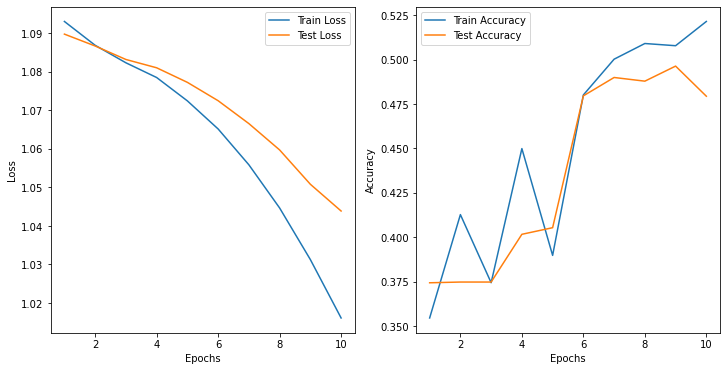

In [71]:
# Plot the accuracy and loss as a function of the epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

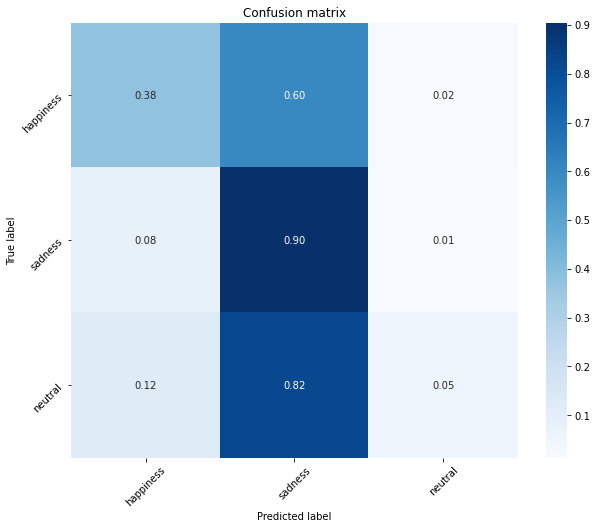

In [72]:
# Evaluate the model
#predictions, targets = evaluate_model(model, test_loader)


# Create confusion matrix
confusion = confusion_matrix(test_labels, test_predictions)

# Normalize the confusion matrix
confusion = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix with heatmap colors and numbers
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='.2f')  # Change the colormap as desired
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(len(all_categories)) + 0.5, all_categories, rotation=45)
plt.yticks(np.arange(len(all_categories)) + 0.5, all_categories, rotation=45)
plt.show()


## 3. different hyperparameters:

In [73]:
#we changed hidden size to 64
optimizer = optim.Adam(model.parameters(), lr=0.001)


model = RNN(input_size= X_train.shape[1], hidden_size=64, output_size=n_categories)
train_losses, train_accuracies, test_losses, test_accuracies, max_acc, test_predictions, test_labels = train(model)

Epoch [1/10], Train Loss: 1.1158, Train Acc: 0.2687, Test Loss: 1.1161, Test Acc: 0.2688
Epoch [2/10], Train Loss: 1.1157, Train Acc: 0.2687, Test Loss: 1.1158, Test Acc: 0.2688
Epoch [3/10], Train Loss: 1.1156, Train Acc: 0.2687, Test Loss: 1.1158, Test Acc: 0.2688
Epoch [4/10], Train Loss: 1.1157, Train Acc: 0.2687, Test Loss: 1.1160, Test Acc: 0.2688
Epoch [5/10], Train Loss: 1.1156, Train Acc: 0.2687, Test Loss: 1.1156, Test Acc: 0.2688
Epoch [6/10], Train Loss: 1.1155, Train Acc: 0.2687, Test Loss: 1.1160, Test Acc: 0.2688
Epoch [7/10], Train Loss: 1.1156, Train Acc: 0.2687, Test Loss: 1.1162, Test Acc: 0.2688
Epoch [8/10], Train Loss: 1.1157, Train Acc: 0.2687, Test Loss: 1.1159, Test Acc: 0.2688
Epoch [9/10], Train Loss: 1.1156, Train Acc: 0.2687, Test Loss: 1.1160, Test Acc: 0.2688
Epoch [10/10], Train Loss: 1.1155, Train Acc: 0.2687, Test Loss: 1.1160, Test Acc: 0.2688


In [74]:
print(f'Reached Max Accuracy of: {max_acc*100:.2f} on Test')

Reached Max Accuracy of: 26.88 on Test


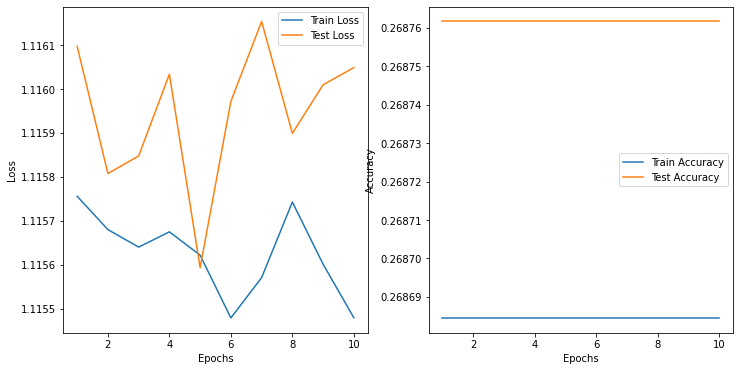

In [75]:
# Plot the accuracy and loss as a function of the epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

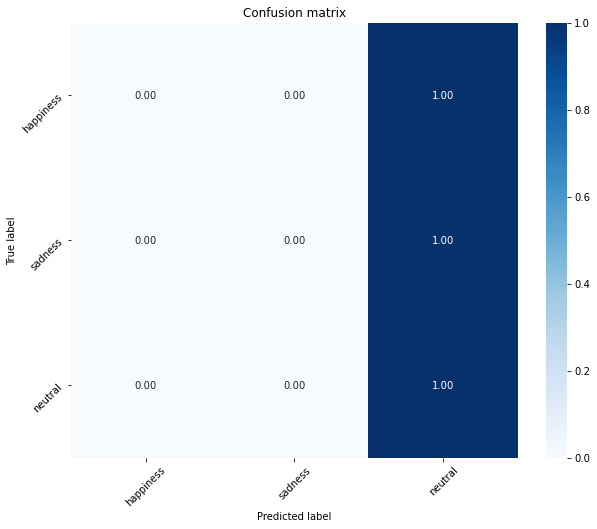

In [76]:
# Evaluate the model
#predictions, targets = evaluate_model(model, test_loader)


# Create confusion matrix
confusion = confusion_matrix(test_labels, test_predictions)

# Normalize the confusion matrix
confusion = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix with heatmap colors and numbers
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='.2f')  # Change the colormap as desired
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(len(all_categories)) + 0.5, all_categories, rotation=45)
plt.yticks(np.arange(len(all_categories)) + 0.5, all_categories, rotation=45)
plt.show()


*****************************

## change regularization

In [77]:
# Define DataLoader
train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=1000, shuffle=True)

test_dataset = CustomDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=True)

In [78]:
class RNNWithDropout(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, rnn_type='lstm', dropout=0.0):
        super(RNNWithDropout, self).__init__()
        self.hidden_size = hidden_size
        self.rnn_type = rnn_type
        
        if rnn_type == 'lstm':
            self.rnn = nn.LSTM(input_size, hidden_size, batch_first=True)
        elif rnn_type == 'gru':
            self.rnn = nn.GRU(input_size, hidden_size, batch_first=True)
        else:
            raise ValueError("Unsupported RNN type. Choose 'lstm' or 'gru'.")
        
        self.fc = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.dropout(out)  # Applying dropout regularization
        out = self.fc(out[:, -1, :])  # Taking the output from the last time step
        return out

In [79]:
model = RNNWithDropout(input_size= X_train.shape[1], hidden_size=64, output_size=n_categories, rnn_type='lstm', dropout=0.2)
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses, train_accuracies, test_losses, test_accuracies, max_acc, test_predictions, test_labels = train(model)

Epoch [1/10], Train Loss: 1.0908, Train Acc: 0.3815, Test Loss: 1.0859, Test Acc: 0.4164
Epoch [2/10], Train Loss: 1.0675, Train Acc: 0.4938, Test Loss: 1.0758, Test Acc: 0.4528
Epoch [3/10], Train Loss: 1.0374, Train Acc: 0.5430, Test Loss: 1.0628, Test Acc: 0.4776
Epoch [4/10], Train Loss: 0.9929, Train Acc: 0.5938, Test Loss: 1.0456, Test Acc: 0.5063
Epoch [5/10], Train Loss: 0.9308, Train Acc: 0.6755, Test Loss: 1.0286, Test Acc: 0.5278
Epoch [6/10], Train Loss: 0.8530, Train Acc: 0.7452, Test Loss: 1.0136, Test Acc: 0.5352
Epoch [7/10], Train Loss: 0.7680, Train Acc: 0.7859, Test Loss: 1.0071, Test Acc: 0.5309
Epoch [8/10], Train Loss: 0.6851, Train Acc: 0.8122, Test Loss: 1.0087, Test Acc: 0.5284
Epoch [9/10], Train Loss: 0.6073, Train Acc: 0.8305, Test Loss: 1.0175, Test Acc: 0.5247
Epoch [10/10], Train Loss: 0.5415, Train Acc: 0.8497, Test Loss: 1.0323, Test Acc: 0.5247


In [80]:
print(f'Reached Max Accuracy of: {max_acc*100:.2f} on Test')

Reached Max Accuracy of: 53.52 on Test


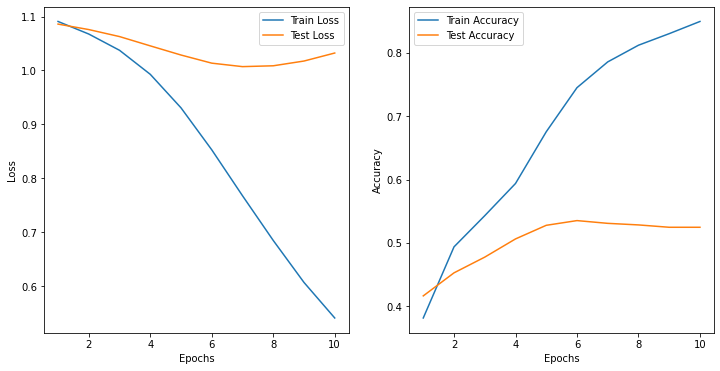

In [81]:
# Plot the accuracy and loss as a function of the epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

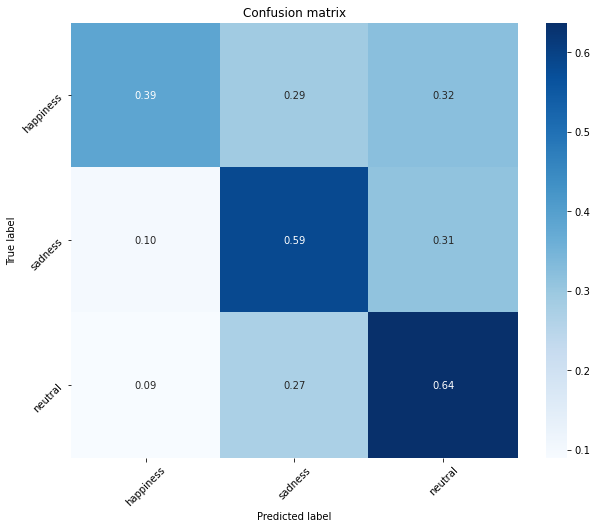

In [82]:
# Evaluate the model
#predictions, targets = evaluate_model(model, test_loader)


# Create confusion matrix
confusion = confusion_matrix(test_labels, test_predictions)

# Normalize the confusion matrix
confusion = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix with heatmap colors and numbers
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='.2f')  # Change the colormap as desired
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(len(all_categories)) + 0.5, all_categories, rotation=45)
plt.yticks(np.arange(len(all_categories)) + 0.5, all_categories, rotation=45)
plt.show()


### c) Discussion (10 pt)
<p style="font-size: 17px">
Discuss the differences in the methods you have tried. 
</p>

The 2 models have some differences:

1. Architecture: Vanilla RNN maintains only one set of weights that operates on sequential input data, while LSTMs have a more complex architecture, which includes multiple gates (input gate, forget gate, and output gate) that control the flow of information

2. Memory Capacity: LSTM models are designed to deal with the vanishing gradient problem, which is common in Vanilla RNNs, by  maintain information and dependencies over longer periods.

3. Training: vanilla RNNs may struggle to converge on long-term dependencies capturing tasks due to the vanishing gradient problem. LSTMs are mostly achieve better performances on tasks with long sequences processing. 

4. Training complexity: As we saw in our model, LSTMs require more resources and time than the Vanilla RNN model.


In the data we recieved, we didn't see any big difference in our results of each model. We believe the reason for that is the sentences we trained our models on were too short for significant long term processing.

We also noticed that the LSTM training took much more time than the Vanilla RNN model, as explained above.



Different hyperparameters - we tried to use a lower hidden size in our model. Smaller hidden size means fewer parameters learned in the hidden layer, which reduces the model's ability to learn complex patterns in the data.

Different optimizer and regularization - we tried to use sgd instead of adam. It seems the model did a little worse than the original LSTM model, but still gave us good enough score. As for the regularization, we tried to use dropout regularization, in order to reduce overfitting. The regularized model gave us almost the same result. That could happen because our data and model are to simple, so it could cause underfitting, and in this case adding regularization won't help.

*****************************